In [1]:
import os
import numpy as np 
import pandas as pd 
import tensorflow as tf 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random 

%matplotlib inline

In [33]:
image_path='Data/img_align_celeba/img_align_celeba/'
# load csv files using pandas
df_attr=pd.read_csv('Data/list_attr_celeba.csv')
df_eval_partition=pd.read_csv('Data/list_eval_partition.csv')

#file names for each partition
train_fname=df_eval_partition[df_eval_partition["partition"]==0]
val_fname=df_eval_partition[df_eval_partition["partition"]==1]
test_fname=df_eval_partition[df_eval_partition["partition"]==2]

#change -1 to 0 in df_attr
df_attr.replace(to_replace=-1, value=0,inplace=True)
df_attr.head()
array=df_attr[df_attr["image_id"]=='000001.jpg'].values
array_2=array[0,1:]
print(array_2)

[0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1
 0 0 1]


In [3]:
Batch_Size=10
Image_Size=[178,218]
Epochs=5
#train_fname.iloc[2,0]

# Load Random example images


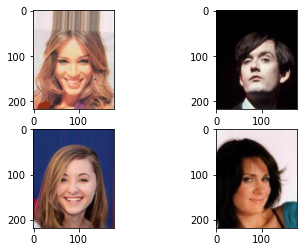

In [35]:

for i in range(4):
    random_int=random.randint(1,1000)
    plt.subplot(2,2,i+1)
    random.randint(1,1000)
    img = mpimg.imread(image_path+str(train_fname.iloc[i+random_int,0])) 
    imgplot = plt.imshow(img)




# Load images into tf.data


In [7]:
train_list_ds=tf.data.Dataset.from_tensor_slices(image_path + train_fname.iloc[:,0])
val_list_ds=tf.data.Dataset.from_tensor_slices(image_path + val_fname.iloc[:,0])

In [8]:
for f in train_list_ds.take(5):
    print(f.numpy())

b'Data/img_align_celeba/img_align_celeba/000001.jpg'
b'Data/img_align_celeba/img_align_celeba/000002.jpg'
b'Data/img_align_celeba/img_align_celeba/000003.jpg'
b'Data/img_align_celeba/img_align_celeba/000004.jpg'
b'Data/img_align_celeba/img_align_celeba/000005.jpg'


In [ ]:
#function to get label for an image given the filepath to the image and the data frame containing labels
def get_label(file_path,df_attr):
    head_tail=os.path.split(file_path)
    image_name=head_tail[1]
    attribute_row=df_attr[df_attr["image_id"]==image_name].values
    labels=attribute_row.values[0,1:]



In [ ]:
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return img #tf.image.resize(img, IMAGE_SIZE)

In [ ]:
#function to return decoded image and label
def process_path(file_path):
    label = get_label(file_path)
    # load the raw data from the file as a string
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img, label